In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.special import expit
from sklearn.metrics import accuracy_score

from NeuralNet import NeuralNet, Dense, softmax

np.set_printoptions(suppress=True, precision=2)

In [2]:
import urllib.request

training = (
    "http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz",
    "http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz"
)

testing = (
    "http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz",
    "http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz"
)

def dl_mnist(ds, prefix):
    img_url, lab_url = ds
    print(f"Downloading {prefix}")
    urllib.request.urlretrieve(img_url, f'./{prefix}-img')
    urllib.request.urlretrieve(lab_url, f'./{prefix}-lab')
    print("Done")

In [3]:
dl_mnist(training, "train")

Done


In [4]:
import struct
import gzip

def print_data(x):
    plt.imshow(x.reshape(28, 28), cmap='Greys')
    plt.axis('off')
    
def read_dataset(imgname, labname):
    X = []
    y = []
    with gzip.open(imgname, "rb") as img, gzip.open(labname, "rb") as labs:
        img_header = struct.unpack(">4i", img.read(16))
        lab_header = struct.unpack(">2i", labs.read(8))
        
        img_size = img_header[2] * img_header[3]
        
        for i in range(img_header[1]):
            image = struct.unpack(f"{img_size}B", img.read(img_size))
            label = struct.unpack("B", labs.read(1))
            X.append(image)
            y.append(label[0])
        X = np.array(X) / 255
    return X, np.array(y)

In [5]:
X, y = read_dataset("train-img", "train-lab")
yt = np.array([[1 if i == x else 0 for i in range(10)] for x in y])

In [6]:
NN = NeuralNet()

In [7]:
NN.append(Dense(10, 784, learning_rate=0.1))
#NN.append(Dense(10, 10, learning_rate=0.1))
NN.append(Dense(10, 10, activation=softmax, learning_rate=0.1))

In [8]:
loss = NN.train(X, yt, epoch=200, batch=100, verbose=True)

Epoch: 1 / 200 -- learning_rate: 0.1 -- loss: 2.2362686900915643
Epoch: 2 / 200 -- learning_rate: 0.1 -- loss: 1.730678854629757
Epoch: 3 / 200 -- learning_rate: 0.1 -- loss: 1.4886077028724451
Epoch: 4 / 200 -- learning_rate: 0.1 -- loss: 1.3416295487411485
Epoch: 5 / 200 -- learning_rate: 0.1 -- loss: 1.239187152442944
Epoch: 6 / 200 -- learning_rate: 0.1 -- loss: 1.1604671237091468
Epoch: 7 / 200 -- learning_rate: 0.1 -- loss: 1.0994144942878994
Epoch: 8 / 200 -- learning_rate: 0.1 -- loss: 1.04896871793465
Epoch: 9 / 200 -- learning_rate: 0.1 -- loss: 1.0068969984058371
Epoch: 10 / 200 -- learning_rate: 0.1 -- loss: 0.9707599770258419
Epoch: 11 / 200 -- learning_rate: 0.1 -- loss: 0.9391772640162749
Epoch: 12 / 200 -- learning_rate: 0.1 -- loss: 0.9102612639788148
Epoch: 13 / 200 -- learning_rate: 0.1 -- loss: 0.8853135969826683
Epoch: 14 / 200 -- learning_rate: 0.1 -- loss: 0.8631065446231783
Epoch: 15 / 200 -- learning_rate: 0.1 -- loss: 0.8432706007622766
Epoch: 16 / 200 -- lear

Epoch: 125 / 200 -- learning_rate: 0.1 -- loss: 0.4651662112146958
Epoch: 126 / 200 -- learning_rate: 0.1 -- loss: 0.4645331818938842
Epoch: 127 / 200 -- learning_rate: 0.1 -- loss: 0.4634066302724898
Epoch: 128 / 200 -- learning_rate: 0.1 -- loss: 0.4630339324840366
Epoch: 129 / 200 -- learning_rate: 0.1 -- loss: 0.46166435850577614
Epoch: 130 / 200 -- learning_rate: 0.1 -- loss: 0.4602226668692742
Epoch: 131 / 200 -- learning_rate: 0.1 -- loss: 0.45991043349624955
Epoch: 132 / 200 -- learning_rate: 0.1 -- loss: 0.458864300820445
Epoch: 133 / 200 -- learning_rate: 0.1 -- loss: 0.4583420113706009
Epoch: 134 / 200 -- learning_rate: 0.1 -- loss: 0.4575577707433379
Epoch: 135 / 200 -- learning_rate: 0.1 -- loss: 0.45626386269423796
Epoch: 136 / 200 -- learning_rate: 0.1 -- loss: 0.45511715965955873
Epoch: 137 / 200 -- learning_rate: 0.1 -- loss: 0.45477173130571863
Epoch: 138 / 200 -- learning_rate: 0.1 -- loss: 0.4537298957492626
Epoch: 139 / 200 -- learning_rate: 0.1 -- loss: 0.45270443

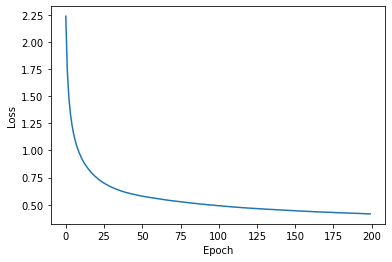

In [9]:
plt.plot(loss)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

In [10]:
dl_mnist(testing, "test")

Done


In [11]:
X_test, y_test = read_dataset("test-img", "test-lab")
yt_test = np.array([[1 if i == x else 0 for i in range(10)] for x in y_test])

In [12]:
accuracy_score(y_test, np.argmax(NN.forward(X_test), axis=1))

0.9203

array([[0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.99]])

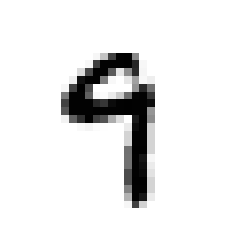

In [14]:
example = 108
print_data(X_test[example])
NN.forward(X_test[example])